#The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the loss function during the training of neural networks.

#Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum.

#Adam as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

#Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

#Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

#Steps Involved in the Adam Optimization Algorithm

#1. Initialize the first and second moments’ moving averages (m and v) to zero.
#2. Compute the gradient of the loss function to the model parameters.

#3. Update the moving averages using exponentially decaying averages. This involves calculating m_t and v_t as weighted averages of the previous moments and the current gradient.

#4. Apply bias correction to the moving averages, particularly during the early iterations.

#5. Calculate the parameter update by dividing the bias-corrected first moment by the square root of the bias-corrected second moment, with an added small constant (epsilon) for numerical stability.

#6. Update the model parameters using the calculated updates.

#7. Repeat steps 2-6 for a specified number of iterations or until convergence.

#Key Features of Adam Optimizer
#1. Adaptive Learning Rates: Adam adjusts the learning rates for each parameter individually. It calculates a moving average of the first-order moments (the mean of gradients) and the second-order moments (the uncentered variance of gradients) to scale the learning rates adaptively. This makes it well-suited for problems with sparse gradients or noisy data.

#2. Bias Correction: To counteract the initialization bias in the first moments, Adam applies bias correction during the early iterations of training. This ensures faster convergence and stabilizes the training process.

#3. Low Memory Requirements: Unlike some optimization algorithms that require storing a history of gradients for each parameter, Adam only needs to maintain two moving averages per parameter. This makes it memory-efficient, especially for large neural networks.

#Practical Tips for Using Adam Optimizer
#1. Learning Rate: While Adam adapts the learning rates, choosing a reasonable initial learning rate is still essential. It often performs well with the default value of 0.001.

#2. Epsilon Value: The epsilon (ε) value is a small constant added for numerical stability. Typical values are in the range of 1e-7 to 1e-8. It’s rarely necessary to change this value.

#3. Monitoring: Monitor your training process by monitoring the loss curve and other relevant metrics. Adjust learning rates or other hyperparameters if necessary.

#4. Regularization: Combine Adam with regularization techniques like dropout or weight decay to prevent overfitting.

#Practical Implementation
#Gradient Descent With Adam
#First, let’s define an optimization function. We will use a simple two-dimensional function that squares the input of each dimension and defines the range of valid inputs from -1.0 to 1.0.

#The objective() function below implements this function.

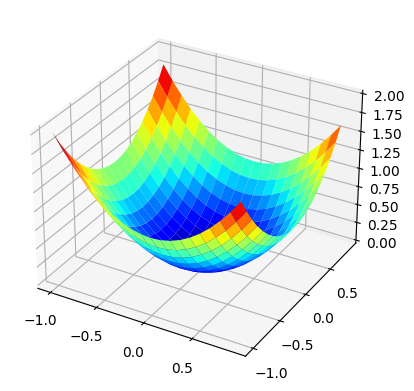

In [ ]:
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

def objective(x, y):
    return x**2.0 + y**2.0

# define range for input
range_min, range_max = -1.0, 1.0

# sample input range uniformly at 0.1 increments
xaxis = arange(range_min, range_max, 0.1)
yaxis = arange(range_min, range_max, 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

results = objective(x, y)

figure = pyplot.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, results, cmap='jet')

# show the plot
pyplot.show()

#Adam in Neural Network
#Here’s a simplified Python code example demonstrating how to use the Adam optimizer in a neural network training scenario using the popular deep learning library TensorFlow. In this example, we’ll use TensorFlow’s Keras API for creating and training a simple neural network for image classification:

#1. Importing Library:

In [ ]:
import keras # Import the Keras library
from keras.datasets import mnist # Load the MNIST dataset
from keras.models import Sequential # Initialize a sequential model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

#2. Split Data in train and test:

In [ ]:
# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the training and test data
print(x_train.shape, y_train.shape)

# Reshape the training and test data to 4 dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the input shape
input_shape = (28, 28, 1)

# Convert the labels to categorical format
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Convert the pixel values to floats between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the pixel values by dividing them by 255
x_train /= 255
x_test /= 255

# Define the batch size and number of classes
batch_size = 60
num_classes = 10

# Define the number of epochs to train the model for
epochs = 10

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


#3. Define model function:

In [ ]:
"""
  Builds a CNN model for MNIST digit classification.

  Args:
    optimizer: The optimizer to use for training the model.

  Returns:
    A compiled Keras model.
  """

def build_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#4. Optimization in Neural Network:

In [ ]:
optimizers=['Adagrad','Adam','SGD']#import csv
histories ={opt:build_model(opt).fit(x_train,y_train,batch_size=batch_size,
epochs=epochs,verbose=1,validation_data=(x_test,y_test)) for opt in optimizers}

Epoch 1/10
1000/1000 [==============================] - 36s 35ms/step - loss: 1.5806 - accuracy: 0.5402 - val_loss: 0.7740 - val_accuracy: 0.8356
Epoch 2/10
1000/1000 [==============================] - 30s 30ms/step - loss: 0.7997 - accuracy: 0.7667 - val_loss: 0.4907 - val_accuracy: 0.8775
Epoch 3/10
1000/1000 [==============================] - 30s 30ms/step - loss: 0.6282 - accuracy: 0.8155 - val_loss: 0.4065 - val_accuracy: 0.8939
Epoch 4/10
1000/1000 [==============================] - 29s 29ms/step - loss: 0.5514 - accuracy: 0.8353 - val_loss: 0.3624 - val_accuracy: 0.9016
Epoch 5/10
1000/1000 [==============================] - 30s 30ms/step - loss: 0.5113 - accuracy: 0.8487 - val_loss: 0.3362 - val_accuracy: 0.9081
Epoch 6/10
1000/1000 [==============================] - 31s 31ms/step - loss: 0.4769 - accuracy: 0.8577 - val_loss: 0.3144 - val_accuracy: 0.9137
Epoch 7/10
1000/1000 [==============================] - 29s 29ms/step - loss: 0.4538 - accuracy: 0.8651 - val_loss: 0.2981 -

#Advantages of Using Adam Optimizer
#1. Fast Convergence: Adam often converges faster than traditional gradient descent-based optimizers, especially on complex loss surfaces.

#2. Adaptive Learning Rates: The adaptive learning rates make it suitable for various machine learning tasks, including natural language processing, computer vision, and reinforcement learning.

#3. Low Memory Usage: Low memory requirements allow training large neural networks without running into memory constraints.

#4. Robustness: Adam is relatively robust to hyperparameter choices, making it a good choice for practitioners without extensive hyperparameter tuning experience.